In [1]:
#Import relevant libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

In [2]:
#Read the dataset

dataset=pd.read_csv('Uber_data.csv')

In [3]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
dataset.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
dataset.info() #Nearly 1156 entries, ~63.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
#Remove the unecessary data

dataset=dataset[:-1]

In [7]:
#Show the null values

dataset.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

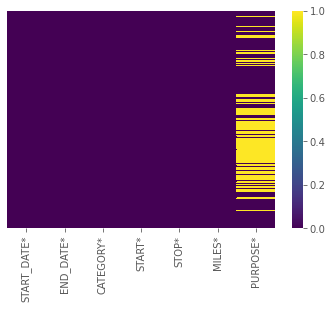

In [8]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

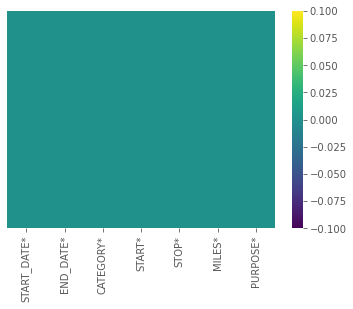

In [9]:
#Drop/Remove the null values

dataset=dataset.dropna()
sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

In [10]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], format="%m/%d/%Y %H:%M")
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], format="%m/%d/%Y %H:%M")

In [11]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in dataset['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
dataset['HOUR']=hour
dataset['DAY']=day
dataset['DAY_OF_WEEK']=dayofweek
dataset['MONTH']=month
dataset['WEEKDAY']=weekday

In [12]:
time=[]
dataset['TRAVEL_TIME']=dataset['END_DATE*']-dataset['START_DATE*']
for i in dataset['TRAVEL_TIME']:
    time.append(i.seconds/60)
dataset['TRAVEL_TIME']=time
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVEL_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


In [13]:
dataset['TRAVEL_TIME']=dataset['TRAVEL_TIME']/60
dataset['SPEED']=dataset['MILES*']/dataset['TRAVEL_TIME']
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVEL_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


In [14]:
dataset.describe()

,MILES*,HOUR,DAY,DAY_OF_WEEK,MONTH,TRAVEL_TIME,SPEED
count,653.000000,653.00000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,11.196325,14.82389,15.719755,3.027565,6.416539,0.389969,25.261340
std,22.986429,4.81733,8.840242,1.951680,3.973976,0.429494,16.815108
min,0.500000,0.00000,1.000000,0.000000,1.000000,0.033333,6.000000
25%,3.200000,12.00000,8.000000,1.000000,3.000000,0.183333,16.571429
50%,6.400000,15.00000,16.000000,3.000000,6.000000,0.300000,22.285714
75%,10.400000,18.00000,23.000000,5.000000,11.000000,0.466667,29.100000
max,310.300000,23.00000,31.000000,6.000000,12.000000,5.500000,228.000000


In [15]:
def convert_time(column_name):
    y=[]
    for x in dataset[column_name]:
        y.append(datetime.datetime.strptime('1/1/2016 21:11', "%m/%d/%Y %H:%M"))

    dataset[column_name] = y

In [16]:
column_date=dataset[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

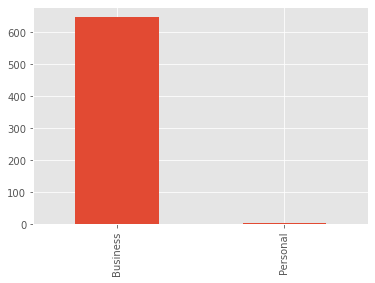

In [17]:
x = dataset['CATEGORY*'].value_counts().plot(kind='bar')

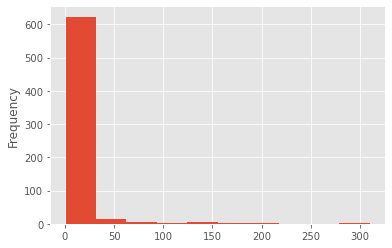

In [18]:
dataset['MILES*'].plot.hist()

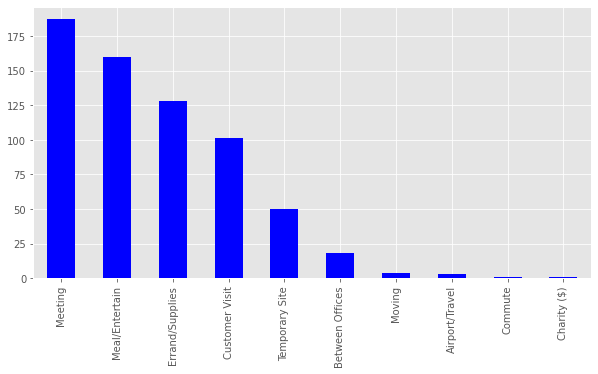

In [19]:
dataset['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

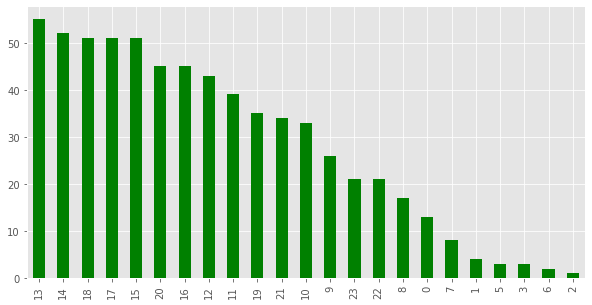

In [20]:
dataset['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

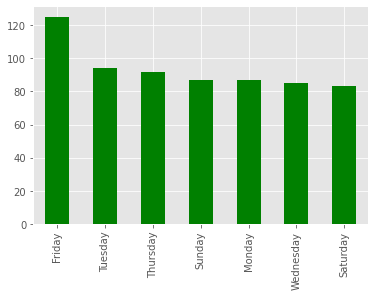

In [21]:
dataset['WEEKDAY'].value_counts().plot(kind='bar',color='green')

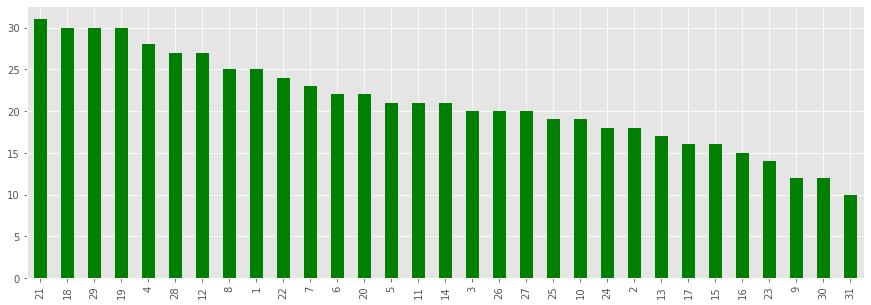

In [22]:
dataset['DAY'].value_counts().plot(kind='bar',figsize=(15,5),color='green')

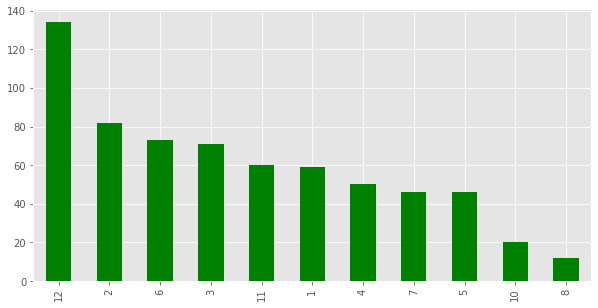

In [23]:
dataset['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

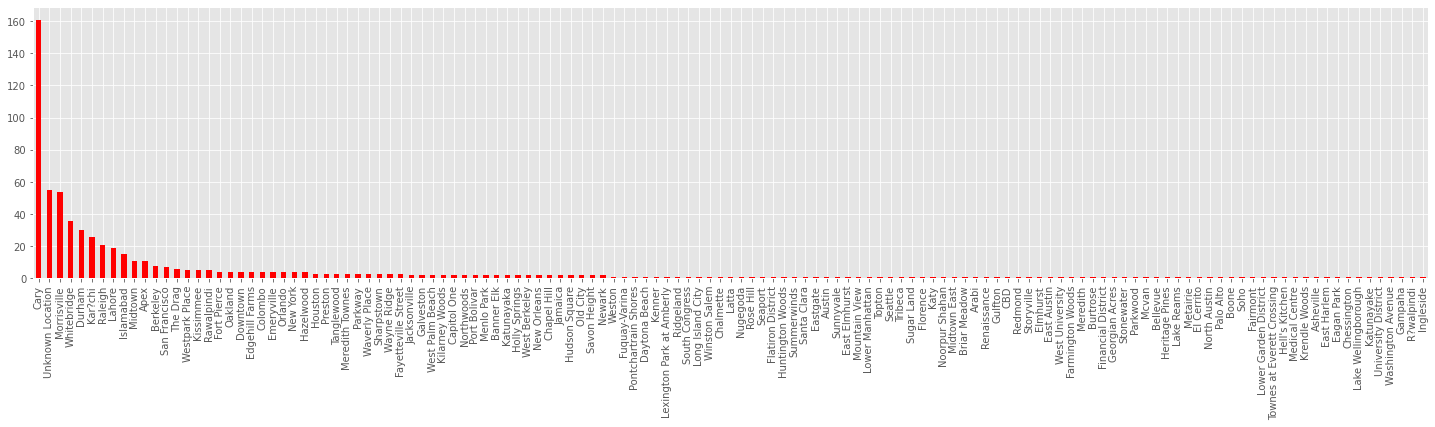

In [24]:
dataset['START*'].value_counts().plot(kind='bar',figsize=(25,5),color='red')

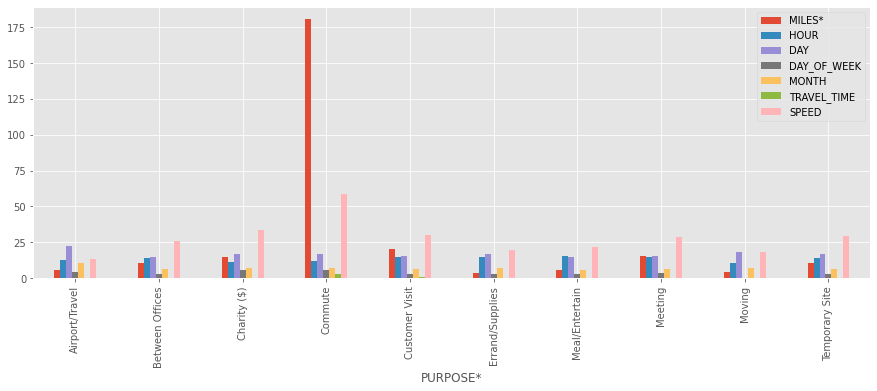

In [25]:
dataset.groupby('PURPOSE*').mean().plot(kind='bar',figsize=(15,5))